# Analysis for the paper "Assessing the impact of misinformation during the spread of infectious diseases", 2025

Author: Alejandro Bernardin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#extend width of jupyter notebook
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "sans-serif")

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"]})
    
"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
"""
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "sans-serif",\n    "font.sans-serif": ["Helvetica"]})\n'

In [2]:
def get_df2plot_Susceptible_dec_aw(df, decay_unaw):
    """
    Input : dataframe, true or false inform infected
    Output: list to plot of susceptible
    """
    df2plot_all_2_1000     = []
    df2plot_all_std_2_1000 = []
    decay_aw_cte_values    = np.sort(df["decay-aw"].unique())
    decay_unaw_cte_values  = np.sort(df["decay-unaw"].unique())
    

    for i in decay_aw_cte_values: # awareness-cte, find all the values for %awareness-cte

        df2plot_2 = df.loc[(df["decay-aw"]==round(i,2)) & (df["decay-unaw"]==round(decay_unaw,2))] 
        df2plot_out_2 = np.zeros(1000)
        df2plot_std_2 = np.zeros(1000)

        for j in np.arange(1000):
            df_aux = df2plot_2.loc[(df2plot_2["[step]"].values==j)]
            aux  = df_aux["count turtles with [ susceptible? ]"].mean()
            aux2 = df_aux["count turtles with [ susceptible? ]"].std()
            df2plot_out_2[j] = aux
            df2plot_std_2[j] = aux2
        #print(aux)
        df2plot_all_2_1000.append(df2plot_out_2)
        df2plot_all_std_2_1000.append(df2plot_std_2)
    return(df2plot_all_2_1000, df2plot_all_std_2_1000)

# 1 Only true information

Simulations where we change the decay awareness $\rho_a$, the protective behavior factor $\gamma_a$ and the percentage of trust-informed people $\alpha_a$

In [3]:
file_true_last_value = "data/fake_news-no_fake-last_value.csv"
df_true_last_value   = pd.read_csv(file_true_last_value, skiprows=6)

In [4]:
decay_aw = np.sort(df_true_last_value["decay-aw"].unique())
alpha_aw = np.sort(df_true_last_value["alpha-aw"].unique())
aw_cte   = np.sort(df_true_last_value["%awareness-cte"].unique())

#susceptible_matrix = np.empty([11,11])

## 1.1 Decay awareness vs %awareness

We show how a system where the behavior is the best possible, this is $\gamma_a=1$

**IMPORTANT**: In netlogo alpha-aw = good_behavior, in the paper we call it $\gamma_a$

$\gamma_a$ = good behavior

$\alpha$ = percentage of informed people

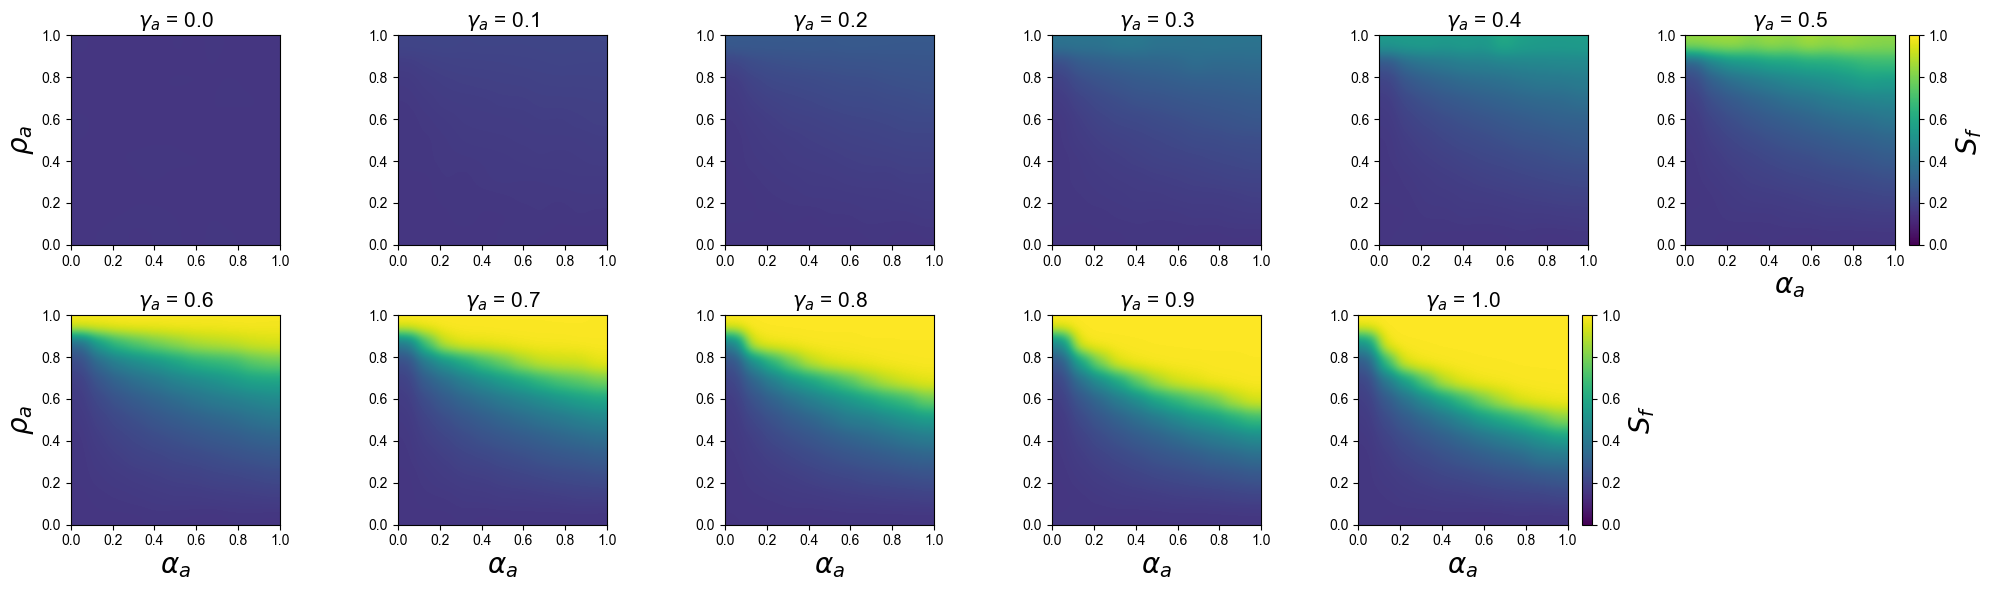

In [5]:
plt.rcParams['figure.figsize'] = 20, 6

susceptible_matrix = np.empty([11,11])

matrix_array = np.empty([11,11,11])

for k_count, k in enumerate(alpha_aw):
    #print(k_count)
    for i_num, i in enumerate(decay_aw):
        #print(i)
        for j_num, j in enumerate(aw_cte):

            df2plot = df_true_last_value.loc[(df_true_last_value["decay-aw"]==round(i,2)) & (df_true_last_value["%awareness-cte"]==round(j,2)) & (df_true_last_value["alpha-aw"]==round(k,2))]
            df2plot_out = np.zeros(800)
            df2plot_std = np.zeros(800)

            #susceptible_matrix = np.empty([11,11])
            #for k in aw_cte:
            df_aux = df2plot.loc[(df2plot["[step]"].values==1000)]# & (df2plot["%awareness-cte"]==round(k,2))]
            aux  = df_aux["count turtles with [ susceptible? ]"].mean()
            aux2 = df_aux["count turtles with [ susceptible? ]"].std()
            #df2plot_out[k] = aux
            #df2plot_std[k] = aux2

            susceptible_matrix[int(i_num)][int(j_num)] = aux #df2plot_out[-1]
    
    matrix_array[k_count] = susceptible_matrix[::-1]
    #print("%AW-CTE {}".format(k))
    #plt.subplot(2,6,k*10+1)
    plt.subplot(2,6,k_count+1)
    plt.imshow(susceptible_matrix[::-1]/10000, extent=[0,1,0,1], interpolation="gaussian")
    if k_count==5 or k_count==10:
        cbar = plt.colorbar()
        cbar.set_label(r'$S_f$', size=20)  # Setting the colorbar name here  

    plt.clim(0,1)
    plt.title(r"$\gamma_a$ = {}".format(k), size=15)
    if k_count>=5:
        plt.xlabel(r"$\alpha_a$", size=20) # %awareness
    if k_count==0 or k_count==6:
        plt.ylabel(r"$\rho_a$", size=20)
    plt.tight_layout()
    
plt.tight_layout()
#plt.savefig("images/true_info_dens_plot_all.pdf")
#plt.savefig("images/true_info_dens_plot_all-arial.pdf")
plt.savefig("images/true_info_dens_plot_all-arial.jpg", format='jpg', dpi=300)


plt.show()

# In the paper we show the last plot and said that it has a perfect good beahavior gamma_a=1.0
# Then we show gamma_a=0.7 and show how the final number of susceptible change due to a decrease in the good behavior.

### 1.1.1 Detail of some plots
We choose two plots and run some simulations on it. The selected plots are for $\gamma_a=1.0$ and $\gamma_a=0.7$. 

/tmp/ipykernel_411746/424787538.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


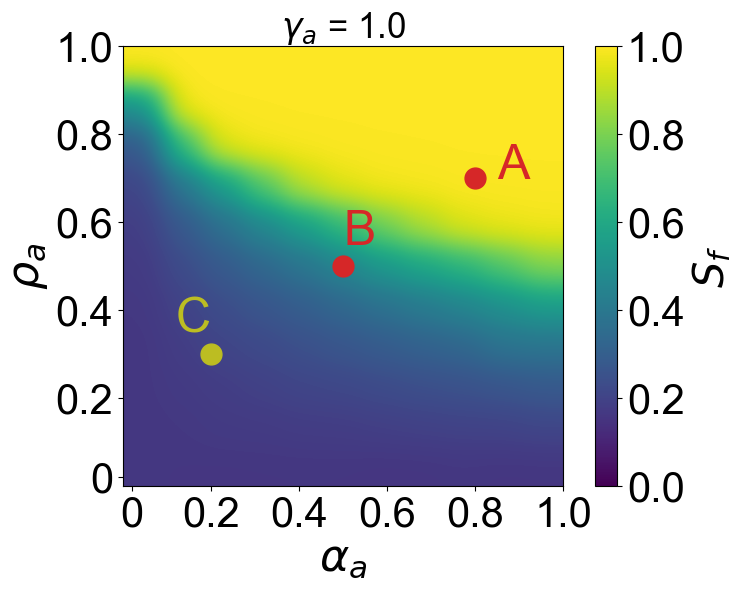

In [6]:
# gamma_a = 1.0
from scipy.ndimage.filters import gaussian_filter1d

plt.rcParams["figure.figsize"] = 8, 6

"""
gauss_dens_plot = np.array(matrix_array[11])#[:,:,-1]

## interpolate matrix ##
x = np.array(range(gauss_dens_plot.shape[0]))
# define new x range, we need 51 equally spaced values
xnew = np.linspace(x.min(), x.max(), 51)
# apply the interpolation to each column
f = interp1d(x, gauss_dens_plot/10000, axis=0)
# get final result
new_gauss_dens_plot = f(xnew)
## end interpolate matrix ##
"""

plt.imshow(matrix_array[10]/10000, extent=[0,1,0,1], interpolation="gaussian")

#colorbar
cb = plt.colorbar() # grab the Colorbar instance
cb.ax.tick_params(labelsize=30)
cb.set_label(r"$S_f$", size=30)
#for t in cb.ax.get_yticklabels():
#     t.set_fontsize(20)
plt.clim(0,1.0)


plt.title(r"$\gamma_a$ = {}".format(1.0), size=25)
plt.xlabel(r"$\alpha_a$", size=32)
plt.ylabel(r"$\rho_a$", size=32)
plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].round(1) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

# (rho, alpha_aw)
plt.plot(0.8, 0.7, '#d62728', marker="o", markersize=15) # (rho, awareness_cte)
plt.plot(0.5, 0.5, '#d62728', marker="o", markersize=15)
plt.plot(0.2, 0.3, '#bcbd22', marker="o", markersize=15) 

# (rho, alpha_aw)
plt.annotate("A", (0.85, 0.7), size=35, color="#d62728")
plt.annotate("B", (0.50, 0.55), size=35, color="#d62728")
plt.annotate("C", (0.12, 0.35), size=35, color="#bcbd22")

plt.tight_layout()
#plt.savefig("images/true_info_dens_plot_a.pdf")
plt.savefig("images/true_info_dens_plot_a-arial.pdf")
plt.show()

/tmp/ipykernel_411746/2691351844.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


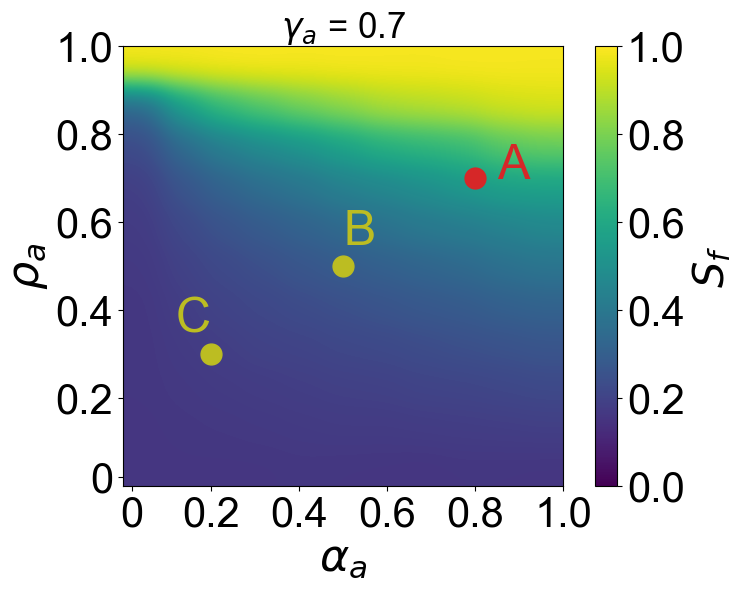

In [7]:
# gamma_a = 0.7
from scipy.ndimage.filters import gaussian_filter1d

plt.rcParams["figure.figsize"] = 8, 6

"""
gauss_dens_plot = np.array(matrix_array[11])#[:,:,-1]

## interpolate matrix ##
x = np.array(range(gauss_dens_plot.shape[0]))
# define new x range, we need 51 equally spaced values
xnew = np.linspace(x.min(), x.max(), 51)
# apply the interpolation to each column
f = interp1d(x, gauss_dens_plot/10000, axis=0)
# get final result
new_gauss_dens_plot = f(xnew)
## end interpolate matrix ##
"""

plt.imshow(matrix_array[6]/10000, extent=[0,1,0,1], interpolation="gaussian")

#colorbar
cb = plt.colorbar() # grab the Colorbar instance
cb.ax.tick_params(labelsize=30)
cb.set_label(r"$S_f$", size=30)
#for t in cb.ax.get_yticklabels():
#     t.set_fontsize(20)
plt.clim(0,1.0)

plt.title(r"$\gamma_a$ = {}".format(0.7), size=25)
plt.xlabel(r"$\alpha_a$", size=32)
plt.ylabel(r"$\rho_a$", size=32)
plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].round(1) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

# (rho, alpha_aw)
plt.plot(0.8, 0.7, '#d62728', marker="o", markersize=15) # (rho, awareness_cte)
plt.plot(0.5, 0.5, '#bcbd22', marker="o", markersize=15)
plt.plot(0.2, 0.3, '#bcbd22', marker="o", markersize=15) 

# (rho, alpha_aw)
plt.annotate("A", (0.85, 0.7), size=35, color="#d62728")
plt.annotate("B", (0.50, 0.55), size=35, color="#bcbd22")
plt.annotate("C", (0.12, 0.35), size=35, color="#bcbd22")

plt.tight_layout()
#plt.savefig("images/true_info_dens_plot_b.pdf")
plt.savefig("images/true_info_dens_plot_b-arial.pdf")

plt.show()

## 1.2 We make 3 simulations to show the behavior in time of susceptible people.

### 1.2.1 $\gamma_a=1.0$

In [8]:
def get_susceptible_stdev(file1, file2, file3):
    # Point 1
    file_3point_1 = file1
    df_3point_1   = pd.read_csv(file_3point_1, skiprows=6)

    # Point 2
    file_3point_2 = file2
    df_3point_2   = pd.read_csv(file_3point_2, skiprows=6)

    # Point 3
    file_3point_3 = file3
    df_3point_3   = pd.read_csv(file_3point_3, skiprows=6)
    
    # Point 1
    susceptible1 = []
    susceptible1_std = []
    for step in range(1000):
        susceptible1.append(df_3point_1.loc[(df_3point_1["[step]"]==round(step,2))]["count turtles with [ susceptible? ]"].mean())
        susceptible1_std.append(df_3point_1.loc[(df_3point_1["[step]"]==round(step,2))]["count turtles with [ susceptible? ]"].std())

    # Point 2
    susceptible2 = []
    susceptible2_std = []
    for step in range(1000):
        susceptible2.append(df_3point_2.loc[(df_3point_2["[step]"]==round(step,2))]["count turtles with [ susceptible? ]"].mean())
        susceptible2_std.append(df_3point_2.loc[(df_3point_2["[step]"]==round(step,2))]["count turtles with [ susceptible? ]"].std())

    # Point 3
    susceptible3 = []
    susceptible3_std = []
    for step in range(1000):
        susceptible3.append(df_3point_3.loc[(df_3point_3["[step]"]==round(step,2))]["count turtles with [ susceptible? ]"].mean())
        susceptible3_std.append(df_3point_3.loc[(df_3point_3["[step]"]==round(step,2))]["count turtles with [ susceptible? ]"].std())
        
    return(susceptible1, susceptible1_std, susceptible2, susceptible2_std, susceptible3, susceptible3_std)

In [9]:
susceptible1, susceptible1_std, susceptible2, susceptible2_std, susceptible3, susceptible3_std = \
get_susceptible_stdev( "data/fake_news-not_fake_3points-1point-table.csv",  "data/fake_news-not_fake_3points-2point-table.csv",  "data/fake_news-not_fake_3points-3point-table.csv")

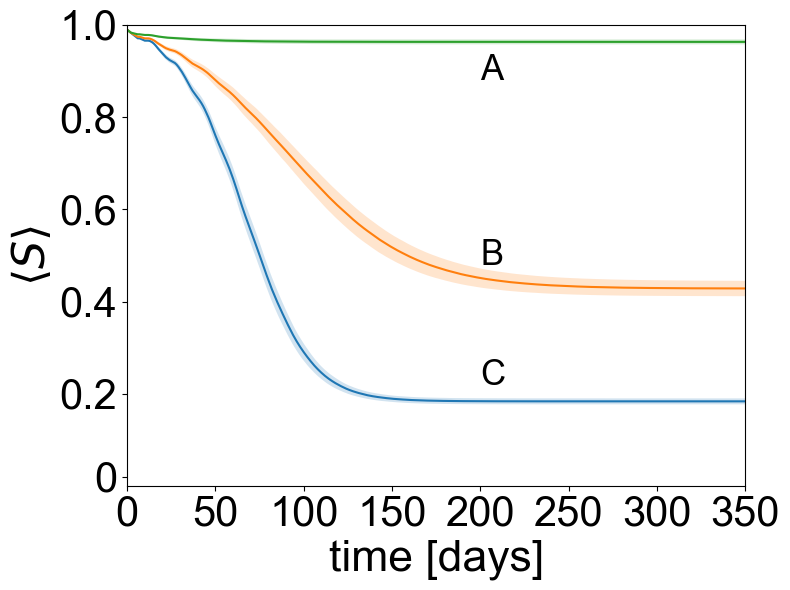

In [10]:
plt.rcParams["figure.figsize"] = 8, 6

time = np.arange(0,1000)
# Data
plt.plot(np.array(susceptible1)/10000)
plt.fill_between(time, np.array(susceptible1)/10000+np.array(susceptible1_std)/10000, np.array(susceptible1)/10000-np.array(susceptible1_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible2)/10000)
plt.fill_between(time, np.array(susceptible2)/10000+np.array(susceptible2_std)/10000, np.array(susceptible2)/10000-np.array(susceptible2_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible3)/10000)
plt.fill_between(time, np.array(susceptible3)/10000+np.array(susceptible3_std)/10000, np.array(susceptible3)/10000-np.array(susceptible3_std)/10000, alpha=0.2)


# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel("r$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (200, 0.88), size=25)
plt.annotate("B", (200, 0.48), size=25)
plt.annotate("C", (200, 0.22), size=25)

plt.tight_layout()

#plt.savefig("images/only_true.pdf")
#plt.savefig("images/true_info_time_plot_a.pdf")
plt.savefig("images/true_info_time_plot_a-arial.pdf")

plt.show()

### 1.2.2 $\gamma_a=0.7$

In [11]:
susceptible1_07, susceptible1_07_std, susceptible2_07, susceptible2_07_std, susceptible3_07, susceptible3_07_std = \
get_susceptible_stdev( "data/fake_news-not_fake_3points-1point-aw0.7-table.csv",  "data/fake_news-not_fake_3points-2point-aw0.7-table.csv",  "data/fake_news-not_fake_3points-3point-aw0.7-table.csv")

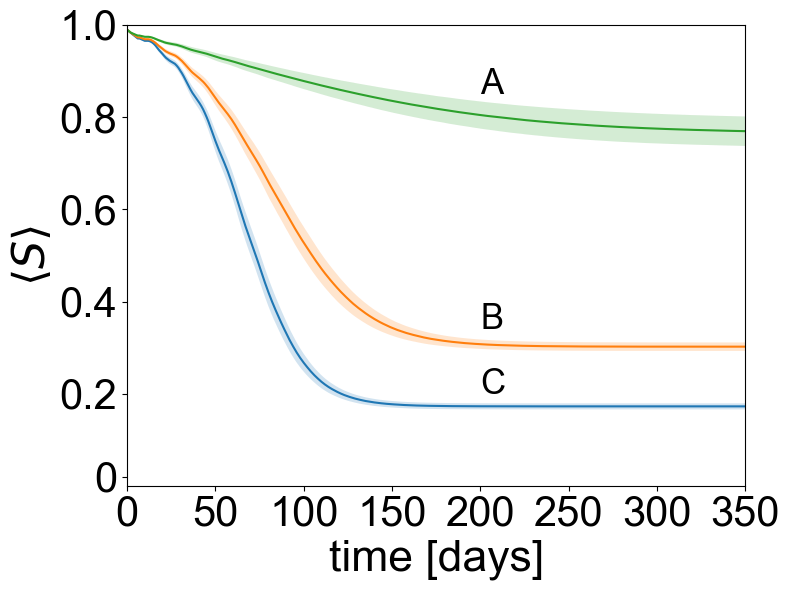

In [12]:
plt.rcParams["figure.figsize"] = 8, 6

time = np.arange(0,1000)
# Data
plt.plot(np.array(susceptible1_07)/10000)
plt.fill_between(time, np.array(susceptible1_07)/10000+np.array(susceptible1_07_std)/10000, np.array(susceptible1_07)/10000-np.array(susceptible1_07_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible2_07)/10000)
plt.fill_between(time, np.array(susceptible2_07)/10000+np.array(susceptible2_07_std)/10000, np.array(susceptible2_07)/10000-np.array(susceptible2_07_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible3_07)/10000)
plt.fill_between(time, np.array(susceptible3_07)/10000+np.array(susceptible3_07_std)/10000, np.array(susceptible3_07)/10000-np.array(susceptible3_07_std)/10000, alpha=0.2)


# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (200, 0.85), size=25)
plt.annotate("B", (200, 0.34), size=25)
plt.annotate("C", (200, 0.20), size=25)

plt.tight_layout()

#plt.savefig("images/only_true.pdf")
#plt.savefig("images/true_info_time_plot_b.pdf")
plt.savefig("images/true_info_time_plot_b-arial.pdf")

plt.show()

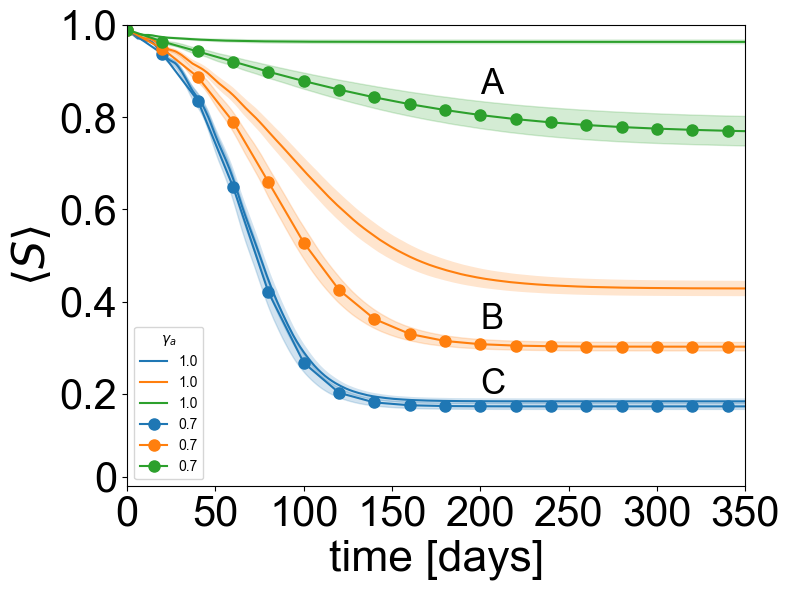

In [13]:
plt.plot(time, np.array(susceptible1)/10000, label="1.0")
plt.plot(time, np.array(susceptible2)/10000, label="1.0")
plt.plot(time, np.array(susceptible3)/10000, label="1.0")
plt.plot(time[::20], np.array(susceptible1_07)[::20]/10000, marker='o', markersize= 8, color="#1f77b4", label="0.7")
plt.plot(time[::20], np.array(susceptible2_07)[::20]/10000, marker='o', markersize= 8, color="#ff7f0e", label="0.7")
plt.plot(time[::20], np.array(susceptible3_07)[::20]/10000, marker='o', markersize= 8, color="#2ca02c", label="0.7")

plt.fill_between(time, np.array(susceptible1)/10000+np.array(susceptible1_std)/10000, np.array(susceptible1)/10000-np.array(susceptible1_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible2)/10000+np.array(susceptible2_std)/10000, np.array(susceptible2)/10000-np.array(susceptible2_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible3)/10000+np.array(susceptible3_std)/10000, np.array(susceptible3)/10000-np.array(susceptible3_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible1_07)/10000+np.array(susceptible1_07_std)/10000, np.array(susceptible1_07)/10000-np.array(susceptible1_07_std)/10000, alpha=0.2, color="#1f77b4")
plt.fill_between(time, np.array(susceptible2_07)/10000+np.array(susceptible2_07_std)/10000, np.array(susceptible2_07)/10000-np.array(susceptible2_07_std)/10000, alpha=0.2, color="#ff7f0e")
plt.fill_between(time, np.array(susceptible3_07)/10000+np.array(susceptible3_07_std)/10000, np.array(susceptible3_07)/10000-np.array(susceptible3_07_std)/10000, alpha=0.2, color="#2ca02c")

# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (200, 0.85), size=25)
plt.annotate("B", (200, 0.34), size=25)
plt.annotate("C", (200, 0.20), size=25)

plt.legend(title="$\gamma_a$")

plt.tight_layout()
#plt.savefig("images/true_info_time_plot_mix.pdf")
plt.show()

## 1.3 Now we insert the behavior $\gamma_a$

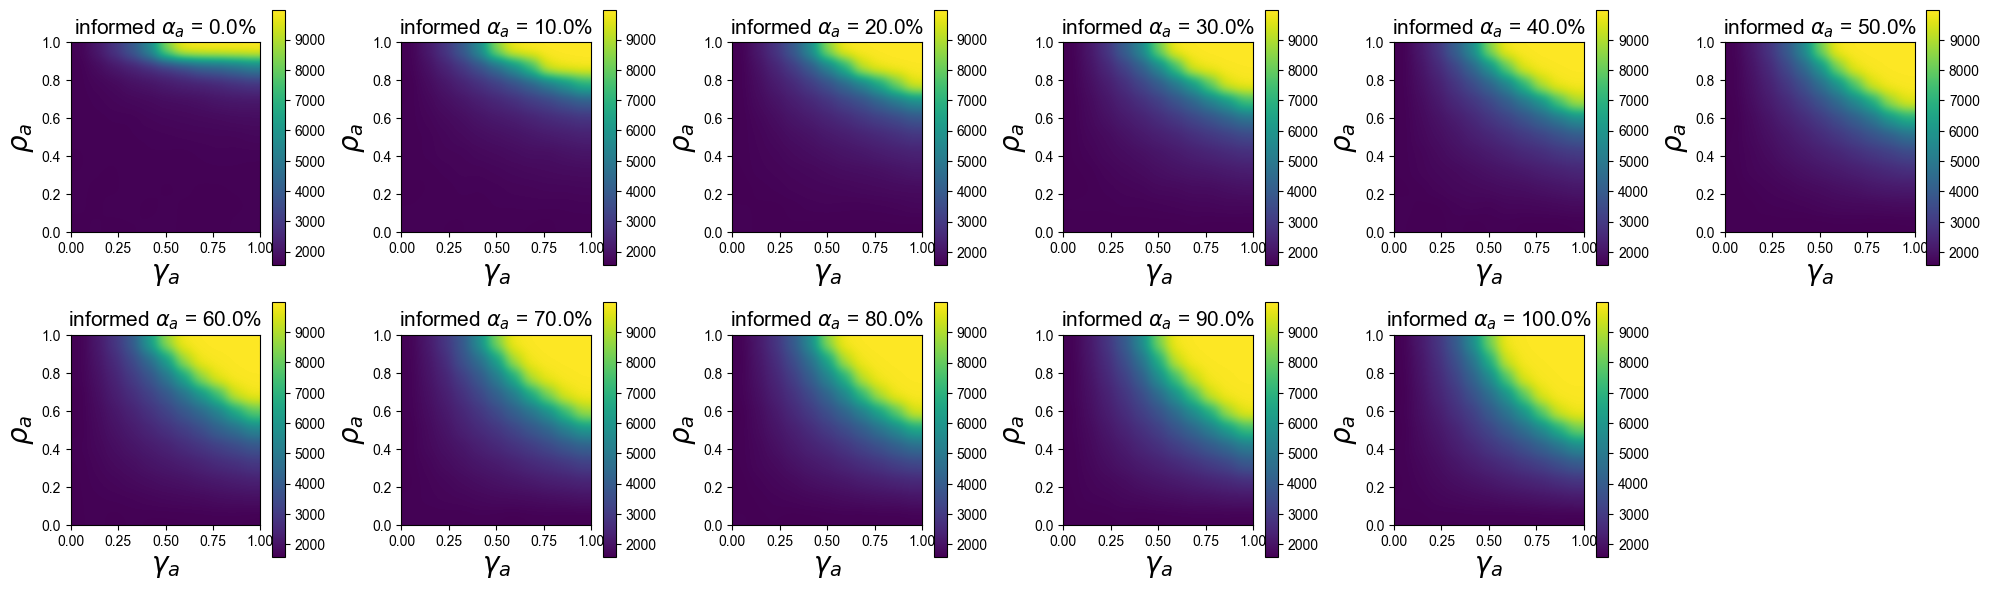

In [14]:
plt.rcParams['figure.figsize'] = 20, 6

susceptible_matrix = np.empty([11,11])

for k_count, k in enumerate(aw_cte):
    for i_num, i in enumerate(decay_aw):
        #print(i)
        for j_num, j in enumerate(alpha_aw):

            df2plot = df_true_last_value.loc[(df_true_last_value["decay-aw"]==round(i,2)) & (df_true_last_value["alpha-aw"]==round(j,2)) & (df_true_last_value["%awareness-cte"]==round(k,2))]
            df2plot_out = np.zeros(800)
            df2plot_std = np.zeros(800)

            #susceptible_matrix = np.empty([11,11])
            #for k in aw_cte:
            df_aux = df2plot.loc[(df2plot["[step]"].values==1000)]# & (df2plot["%awareness-cte"]==round(k,2))]
            aux  = df_aux["count turtles with [ susceptible? ]"].mean()
            aux2 = df_aux["count turtles with [ susceptible? ]"].std()
            #df2plot_out[k] = aux
            #df2plot_std[k] = aux2

            susceptible_matrix[int(i_num)][int(j_num)] = aux #df2plot_out[-1]

    #print("%AW-CTE {}".format(k))
    plt.subplot(2,6,k_count+1)
    plt.imshow(susceptible_matrix[::-1], extent=[0,1,0,1], interpolation="gaussian")
    plt.colorbar()
    plt.title(r"informed $\alpha_a$ = {}%".format(k*100), size=15)
    plt.xlabel(r"$\gamma_a$", size=20)
    plt.ylabel(r"$\rho_a$", size=20)
    plt.tight_layout()
    #plt.show()

            #print(int(i_num), int(j_num))
            #print(susceptible_matrix[int(i_num)][int(j_num)])
            #if int(i_num)==6 and  int(j_num)==9:
            #    susceptible_matrix[i_num][j_num]=0
plt.show()

# se ve que la constante de decaimiento es más importante que el comportamiento preventivo.

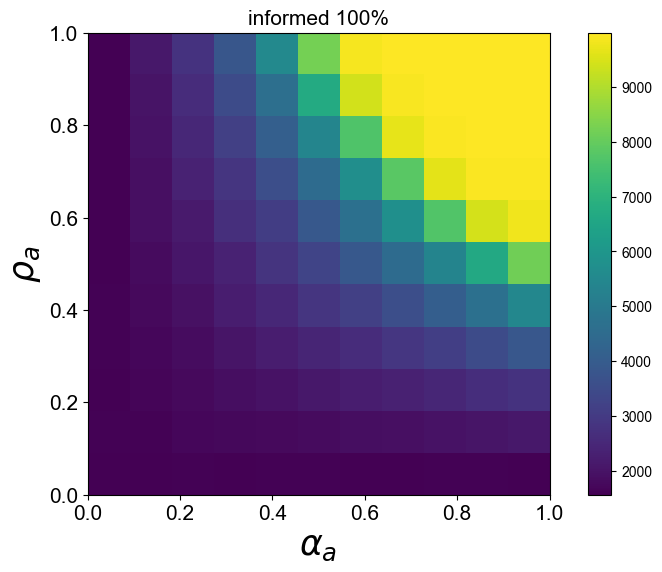

In [15]:
plt.rcParams['figure.figsize'] = 10, 6

plt.imshow(susceptible_matrix[::-1], extent=[0,1,0,1])
plt.colorbar()
plt.xlabel(r"$\alpha_a$", size=25)
plt.ylabel(r"$\rho_a$", size=25)
plt.tick_params(labelsize=15)

plt.title("informed {}%".format(100, 50), size=15)

# 3rd figure of the paper
#plt.savefig("images/fig3.pdf")

plt.show()

## 2 True and fake information

We run a simulation where true and fake information are present.

In [16]:
file_true_and_fake = "data/plot1_fake_news_aw_unaw_Sf.csv"
df_true_and_fake = pd.read_csv(file_true_and_fake, skiprows=6)

In [17]:
%%time

df = df_true_and_fake

decay_aw = np.sort(df["decay-aw"].unique())
decay_unaw  = np.sort(df["decay-unaw"].unique())

susceptible_matrix = np.empty([11,11])

for i_num, i in enumerate(decay_aw):
    print(i)
    for j_num, j in enumerate(decay_unaw):
        
        df2plot = df.loc[(df["decay-aw"]==round(i,2)) & (df["decay-unaw"]==round(j,2))]
        df2plot_out = np.zeros(800)
        df2plot_std = np.zeros(800)

        for k in np.arange(800):
            df_aux = df2plot.loc[(df2plot["[step]"].values==k)]
            aux  = df_aux["count turtles with [ susceptible? ]"].mean()
            aux2 = df_aux["count turtles with [ susceptible? ]"].std()
            df2plot_out[k] = aux
            df2plot_std[k] = aux2
            
        #susceptible_matrix.append([decay_aw, decay_unaw, df2plot_out[-1]])
        #print(i)
        susceptible_matrix[int(i_num)][int(j_num)] = df2plot_out[-1]

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
CPU times: user 19.3 s, sys: 39.1 ms, total: 19.3 s
Wall time: 18.4 s


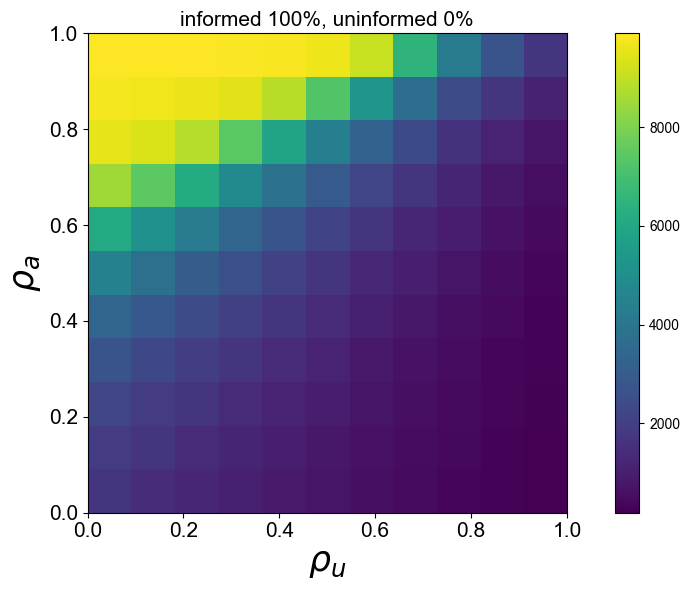

In [18]:
plt.rcParams['figure.figsize'] = 10, 6

plt.imshow(susceptible_matrix[::-1], extent=[0,1,0,1])
plt.colorbar()
plt.xlabel(r"$\rho_u$", size=25)
plt.ylabel(r"$\rho_a$", size=25)
plt.tick_params(labelsize=15)

plt.title("informed {}%, uninformed {}%".format(100, 0), size=15)
plt.tight_layout()

# 3rd figure of the paper
#plt.savefig("images/fig3_a.pdf")

plt.show()

## 2.1 True and fake information, constant awareness.

Here I plot $\rho_a$ vs $\rho_u$, with 100% of informed people and then I increase the amount of uninformed people. The behavior is constant, $\gamma_a,u=1$. (alpha_aw, alpha_unaw in the simulations).

**Important**: $\rho_{a,u}<1$, because if $\rho_{a,u}=1$ we have that $\rho_{a,u}^{i}$, where $i \in N$, so $\rho_{a,u}^{i}=1$ always (last column of density plot is a constant). So maximum value for $\rho_{a,u}\approx0.99$

In [19]:
file_true_fake_lv = "data/fake_news-dec_a-dec_u-perc_unaw-only_last_state.csv" # lv=last_value
df_true_fake_lv   = pd.read_csv(file_true_fake_lv, skiprows=6)

In [20]:
decay_aw = np.sort(df_true_fake_lv["decay-aw"].unique())
alpha_aw = np.sort(df_true_fake_lv["alpha-aw"].unique()) # this is 1
aw_cte   = np.sort(df_true_fake_lv["%awareness-cte"].unique()) # this is 1

decay_unaw = np.sort(df_true_fake_lv["decay-unaw"].unique())
alpha_unaw = np.sort(df_true_fake_lv["alpha-unaw"].unique())
unaw_cte   = np.sort(df_true_fake_lv["%unawareness-cte"].unique())

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


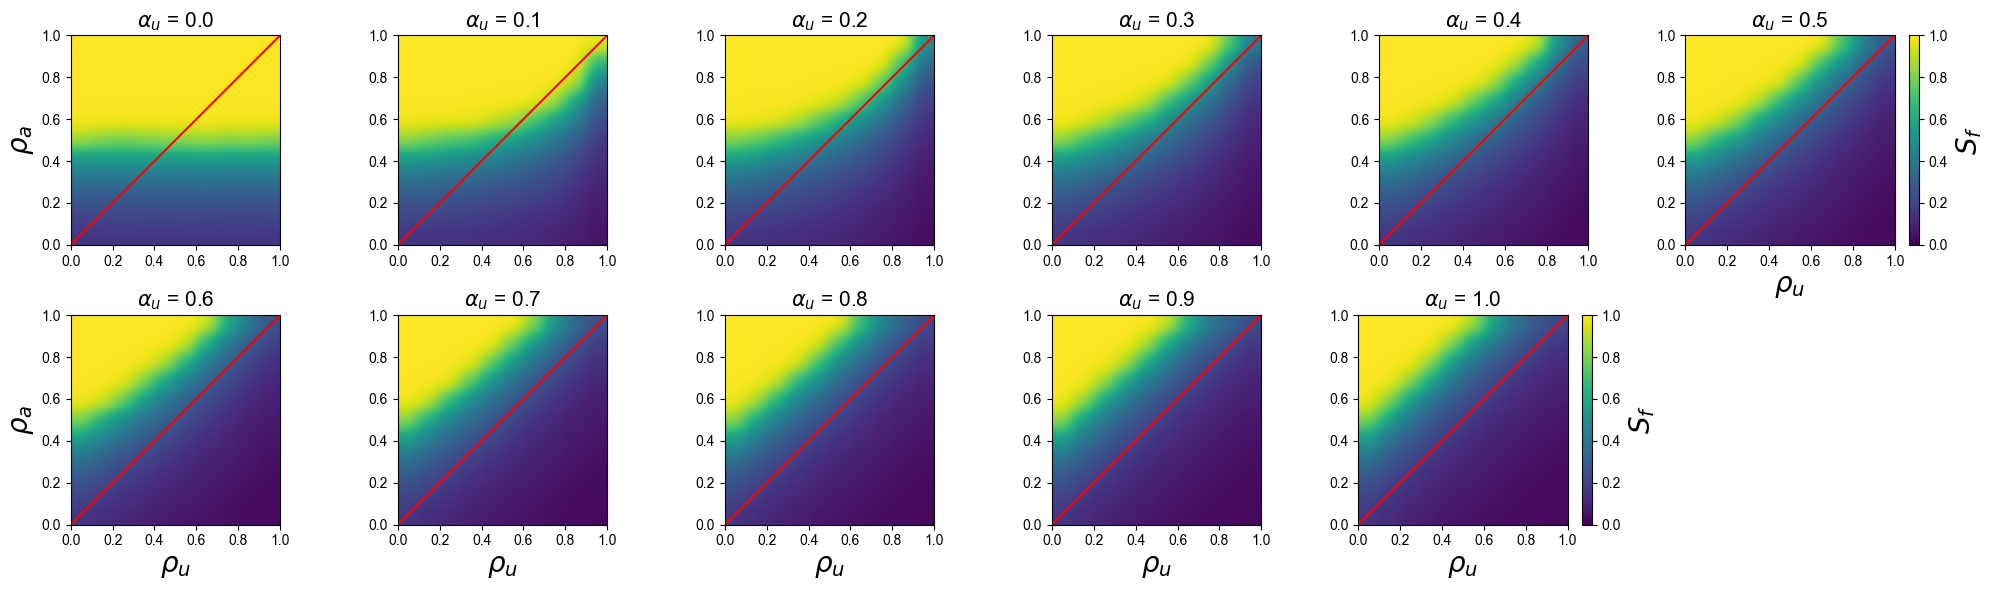

CPU times: user 4.48 s, sys: 45 ms, total: 4.53 s
Wall time: 4.52 s


In [21]:
%%time
plt.rcParams['figure.figsize'] = 20, 6

susceptible_matrix = np.empty([11,11])
matrix_array = np.empty([11,11,11])

for l_num, l in enumerate(unaw_cte):
    print(l)
    for i_num, i in enumerate(decay_aw):
        #print(i)
        for j_num, j in enumerate(decay_unaw):

            df2plot = df_true_fake_lv.loc[(df_true_fake_lv["decay-aw"]==round(i,2)) & (df_true_fake_lv["decay-unaw"]==round(j,2)) & (df_true_fake_lv["%unawareness-cte"]==round(l,2)) ]
            #df2plot_out = np.zeros(800)
            #df2plot_std = np.zeros(800)

            #for k in np.arange(800):
            df_aux = df2plot.loc[(df2plot["[step]"].values==1000)]
            aux  = df_aux["count turtles with [ susceptible? ]"].mean()
            aux2 = df_aux["count turtles with [ susceptible? ]"].std()
            #df2plot_out[k] = aux
            #df2plot_std[k] = aux2

            #susceptible_matrix.append([decay_aw, decay_unaw, df2plot_out[-1]])
            #print(i)
            susceptible_matrix[int(i_num)][int(j_num)] = aux #df2plot_out[-1]
            
    #print(k)
    #print(k*10)
    #print(list(susceptible_matrix[::-1]))
    matrix_array[l_num] = susceptible_matrix[::-1]
    plt.subplot(2,6,l_num+1)
    plt.imshow(susceptible_matrix[:,:-1][::-1]/10000, extent=[0,1,0,1], interpolation="gaussian") # CORRER DE NUEVO!! EJECUTANDO HASTA RHO_A,U=0.99, NO 1.0.
    #plt.imshow(susceptible_matrix[::-1], extent=[0,1,0,1]) # CORRER DE NUEVO!! EJECUTANDO HASTA RHO_A,U=0.99, NO 1.0.
    plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle="solid", color="red")
    if l_num==5 or l_num==10: 
        cbar = plt.colorbar()
        cbar.set_label(r'$S_f$', size=20)  # Setting the colorbar name here

    plt.clim(0,1)
    plt.title(r"$\alpha_u$ = {}".format(l), size=15)
    if l_num>=5:
        plt.xlabel(r"$\rho_u$", size=20) # %awareness
    if l_num==0 or l_num==6:
        plt.ylabel(r"$\rho_a$", size=20)
    plt.tight_layout()
    
plt.tight_layout()
#plt.savefig("images/true-fake_info_dens_plot_misinf_all.pdf")
#plt.savefig("images/true-fake_info_dens_plot_misinf_all-arial.pdf")
plt.savefig("images/true-fake_info_dens_plot_misinf_all-arial.jpg", format='jpg', dpi=300)


plt.show()

### 2.1.1 Detail of some plots

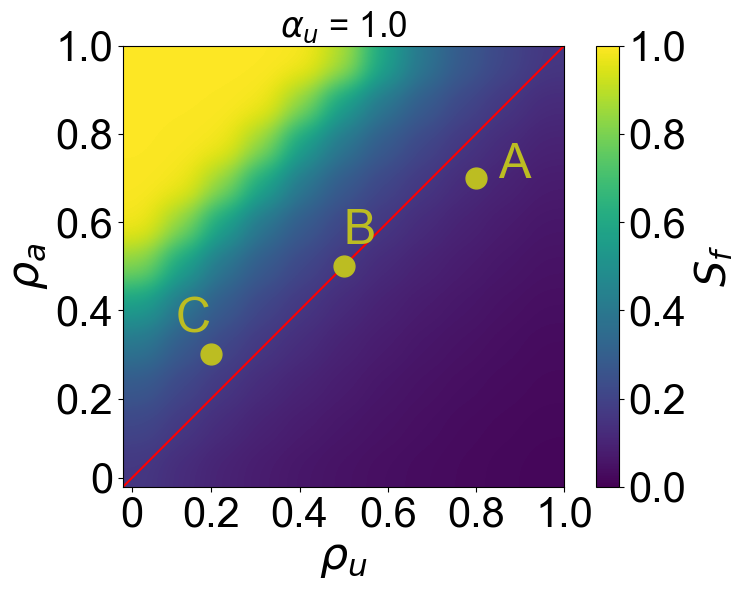

In [22]:
plt.rcParams["figure.figsize"] = 8, 6

plt.imshow(matrix_array[10]/10000, extent=[0,1,0,1], interpolation="gaussian")

#colorbar
cb = plt.colorbar() # grab the Colorbar instance
cb.ax.tick_params(labelsize=30)
cb.set_label(r"$S_f$", size=30)
#for t in cb.ax.get_yticklabels():
#     t.set_fontsize(20)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle="solid", color="red")
plt.clim(0,1.0)

plt.title(r"$\alpha_u$ = {}".format(1.0), size=25)
plt.xlabel(r"$\rho_u$", size=32)
plt.ylabel(r"$\rho_a$", size=32)
plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].round(1) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

# (rho, alpha_aw)
plt.plot(0.8, 0.7, '#bcbd22', marker="o", markersize=15) # (rho, awareness_cte)
plt.plot(0.5, 0.5, '#bcbd22', marker="o", markersize=15)
plt.plot(0.2, 0.3, '#bcbd22', marker="o", markersize=15) 

# (rho, alpha_aw)
plt.annotate("A", (0.85, 0.7), size=35, color="#bcbd22")
plt.annotate("B", (0.50, 0.55), size=35, color="#bcbd22")
plt.annotate("C", (0.12, 0.35), size=35, color="#bcbd22")

plt.tight_layout()
#plt.savefig("images/true-fake_info_dens_plot_misinf_a.pdf")
plt.savefig("images/true-fake_info_dens_plot_misinf_a-arial.pdf")

plt.show()

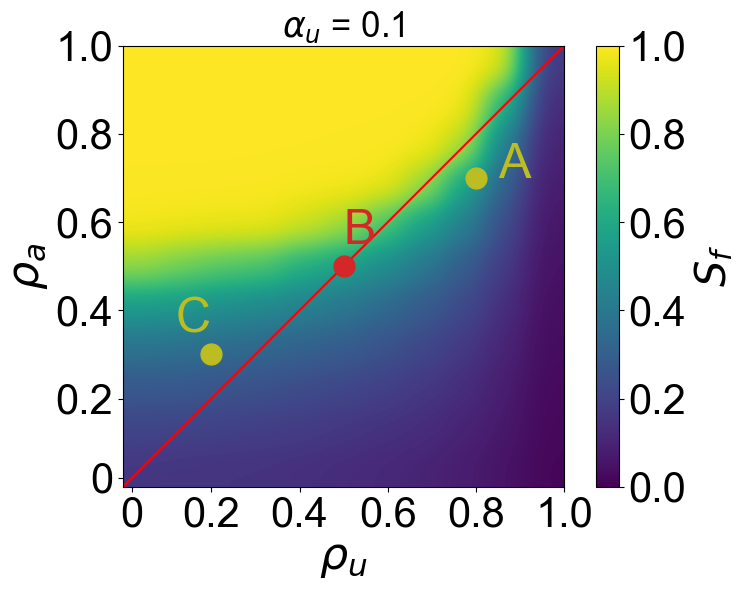

In [23]:
plt.rcParams["figure.figsize"] = 8, 6

plt.imshow(matrix_array[1]/10000, extent=[0,1,0,1], interpolation="gaussian")

#colorbar
cb = plt.colorbar() # grab the Colorbar instance
cb.ax.tick_params(labelsize=30)
cb.set_label(r"$S_f$", size=30)
#for t in cb.ax.get_yticklabels():
#     t.set_fontsize(20)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle="solid", color="red")
plt.clim(0,1.0)

plt.title(r"$\alpha_u$ = {}".format(0.1), size=25)
plt.xlabel(r"$\rho_u$", size=32)
plt.ylabel(r"$\rho_a$", size=32)
plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].round(1) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

# (rho, alpha_aw)
plt.plot(0.8, 0.7, '#bcbd22', marker="o", markersize=15) # (rho, awareness_cte)
plt.plot(0.5, 0.5, '#d62728', marker="o", markersize=15)
plt.plot(0.2, 0.3, '#bcbd22', marker="o", markersize=15) 

# (rho, alpha_aw)
plt.annotate("A", (0.85, 0.7), size=35, color="#bcbd22")
plt.annotate("B", (0.50, 0.55), size=35, color="#d62728")
plt.annotate("C", (0.12, 0.35), size=35, color="#bcbd22")

plt.tight_layout()
#plt.savefig("images/true-fake_info_dens_plot_misinf_b.pdf")
plt.savefig("images/true-fake_info_dens_plot_misinf_b-arial.pdf")

plt.show()

In [24]:
susceptible1, susceptible1_std, susceptible2, susceptible2_std, susceptible3, susceptible3_std = \
get_susceptible_stdev( "data/fake_news-3points-1point-unaw1.0.csv",  "data/fake_news-3points-2point-unaw1.0.csv",  "data/fake_news-3points-3point-unaw1.0.csv")

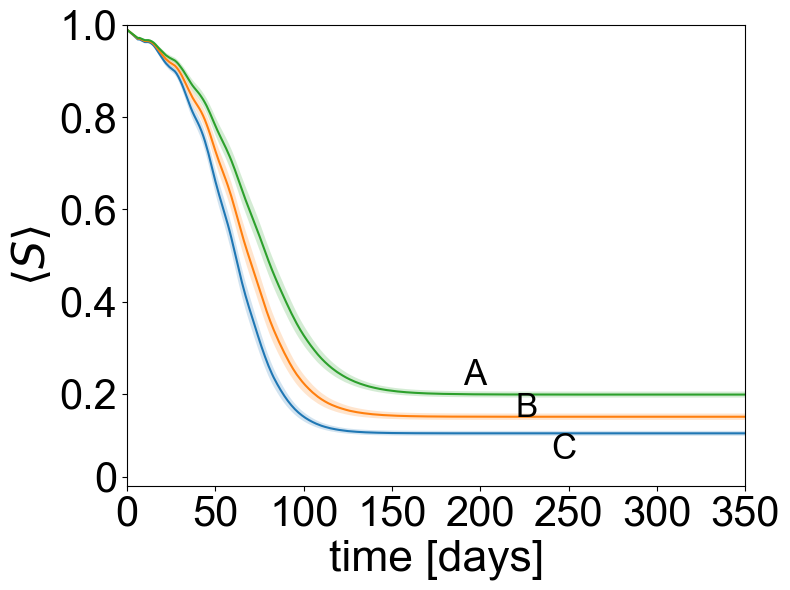

In [25]:
plt.rcParams["figure.figsize"] = 8, 6

time = np.arange(0,1000)
# Data
plt.plot(np.array(susceptible1)/10000)
plt.fill_between(time, np.array(susceptible1)/10000+np.array(susceptible1_std)/10000, np.array(susceptible1)/10000-np.array(susceptible1_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible2)/10000)
plt.fill_between(time, np.array(susceptible2)/10000+np.array(susceptible2_std)/10000, np.array(susceptible2)/10000-np.array(susceptible2_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible3)/10000)
plt.fill_between(time, np.array(susceptible3)/10000+np.array(susceptible3_std)/10000, np.array(susceptible3)/10000-np.array(susceptible3_std)/10000, alpha=0.2)


# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (190, 0.22), size=25)
plt.annotate("B", (220, 0.15), size=24)
plt.annotate("C", (240, 0.06), size=25)

plt.tight_layout()
#plt.savefig("images/true-fake_info_time_plot_misinf_a.pdf")
plt.savefig("images/true-fake_info_time_plot_misinf_a-arial.pdf")

plt.show()

In [26]:
susceptible1_07, susceptible1_07_std, susceptible2_07, susceptible2_07_std, susceptible3_07, susceptible3_07_std = \
get_susceptible_stdev( "data/fake_news-3points-1point-unaw0.1.csv",  "data/fake_news-3points-2point-unaw0.1.csv",  "data/fake_news-3points-3point-unaw0.1.csv")

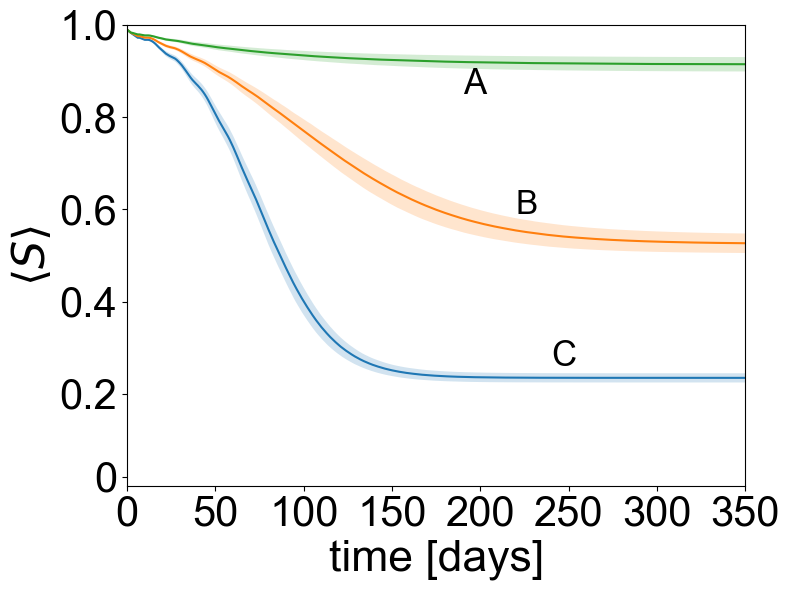

In [27]:
plt.rcParams["figure.figsize"] = 8, 6

time = np.arange(0,1000)
# Data
plt.plot(np.array(susceptible1_07)/10000)
plt.fill_between(time, np.array(susceptible1_07)/10000+np.array(susceptible1_07_std)/10000, np.array(susceptible1_07)/10000-np.array(susceptible1_07_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible2_07)/10000)
plt.fill_between(time, np.array(susceptible2_07)/10000+np.array(susceptible2_07_std)/10000, np.array(susceptible2_07)/10000-np.array(susceptible2_07_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible3_07)/10000)
plt.fill_between(time, np.array(susceptible3_07)/10000+np.array(susceptible3_07_std)/10000, np.array(susceptible3_07)/10000-np.array(susceptible3_07_std)/10000, alpha=0.2)


# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (190, 0.85), size=25)
plt.annotate("B", (220, 0.59), size=24)
plt.annotate("C", (240, 0.26), size=25)

plt.tight_layout()
#plt.savefig("images/true-fake_info_time_plot_misinf_b.pdf")
plt.savefig("images/true-fake_info_time_plot_misinf_b-arial.pdf")

plt.show()

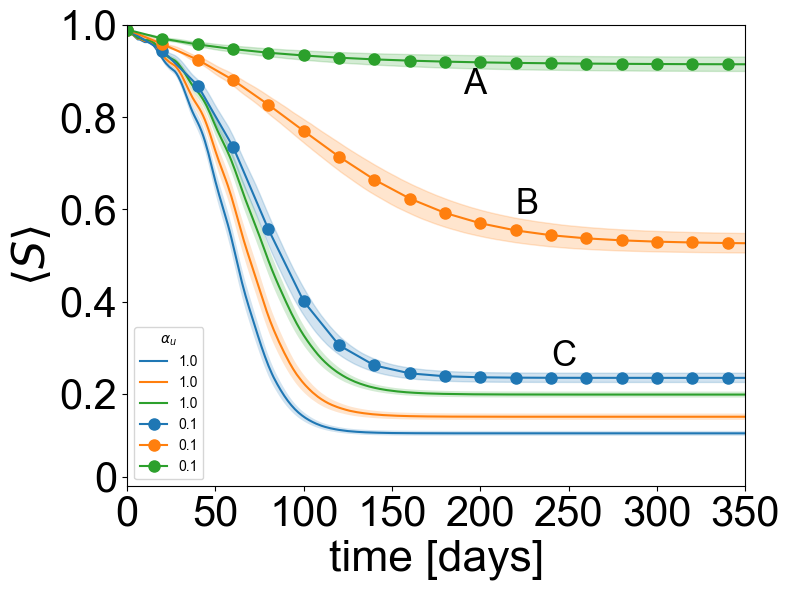

In [28]:
plt.plot(time, np.array(susceptible1)/10000, label="1.0")
plt.plot(time, np.array(susceptible2)/10000, label="1.0")
plt.plot(time, np.array(susceptible3)/10000, label="1.0")
plt.plot(time[::20], np.array(susceptible1_07)[::20]/10000, marker='o', markersize= 8, color="#1f77b4", label="0.1")
plt.plot(time[::20], np.array(susceptible2_07)[::20]/10000, marker='o', markersize= 8, color="#ff7f0e", label="0.1")
plt.plot(time[::20], np.array(susceptible3_07)[::20]/10000, marker='o', markersize= 8, color="#2ca02c", label="0.1")

plt.fill_between(time, np.array(susceptible1)/10000+np.array(susceptible1_std)/10000, np.array(susceptible1)/10000-np.array(susceptible1_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible2)/10000+np.array(susceptible2_std)/10000, np.array(susceptible2)/10000-np.array(susceptible2_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible3)/10000+np.array(susceptible3_std)/10000, np.array(susceptible3)/10000-np.array(susceptible3_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible1_07)/10000+np.array(susceptible1_07_std)/10000, np.array(susceptible1_07)/10000-np.array(susceptible1_07_std)/10000, alpha=0.2, color="#1f77b4")
plt.fill_between(time, np.array(susceptible2_07)/10000+np.array(susceptible2_07_std)/10000, np.array(susceptible2_07)/10000-np.array(susceptible2_07_std)/10000, alpha=0.2, color="#ff7f0e")
plt.fill_between(time, np.array(susceptible3_07)/10000+np.array(susceptible3_07_std)/10000, np.array(susceptible3_07)/10000-np.array(susceptible3_07_std)/10000, alpha=0.2, color="#2ca02c")

# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (190, 0.85), size=25)
plt.annotate("B", (220, 0.59), size=25)
plt.annotate("C", (240, 0.26), size=25)

#misinfo
plt.legend(title=r"$\alpha_u$")

plt.tight_layout()
#plt.savefig("images/true-fake_info_time_plot_misinf_mix.pdf")
plt.savefig("images/true-fake_info_time_plot_misinf_mix-arial.pdf")

plt.show()

## 2.2 True and fake information, constant unawareness.

Here I plot $\rho_a$ vs $\rho_u$, with 100% of UNINFORMED people (people receiving fake news) and then I increase the amount of INFORMED people. The behavior is constant, $\gamma_a,u=1$. (alpha_aw, alpha_unaw in the simulations).

In [29]:
file_true_fake_perc_aw_lv = "data/fake_news-dec_a-dec_u-perc_aw-only_last_state.csv" # lv=last_value
df_true_fake_perc_aw_lv   = pd.read_csv(file_true_fake_perc_aw_lv, skiprows=6)

In [30]:
decay_aw = np.sort(df_true_fake_perc_aw_lv["decay-aw"].unique())
alpha_aw = np.sort(df_true_fake_perc_aw_lv["alpha-aw"].unique()) # this is 1
aw_cte   = np.sort(df_true_fake_perc_aw_lv["%awareness-cte"].unique()) # this is 1

decay_unaw = np.sort(df_true_fake_perc_aw_lv["decay-unaw"].unique())
alpha_unaw = np.sort(df_true_fake_perc_aw_lv["alpha-unaw"].unique())
unaw_cte   = np.sort(df_true_fake_perc_aw_lv["%unawareness-cte"].unique())

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


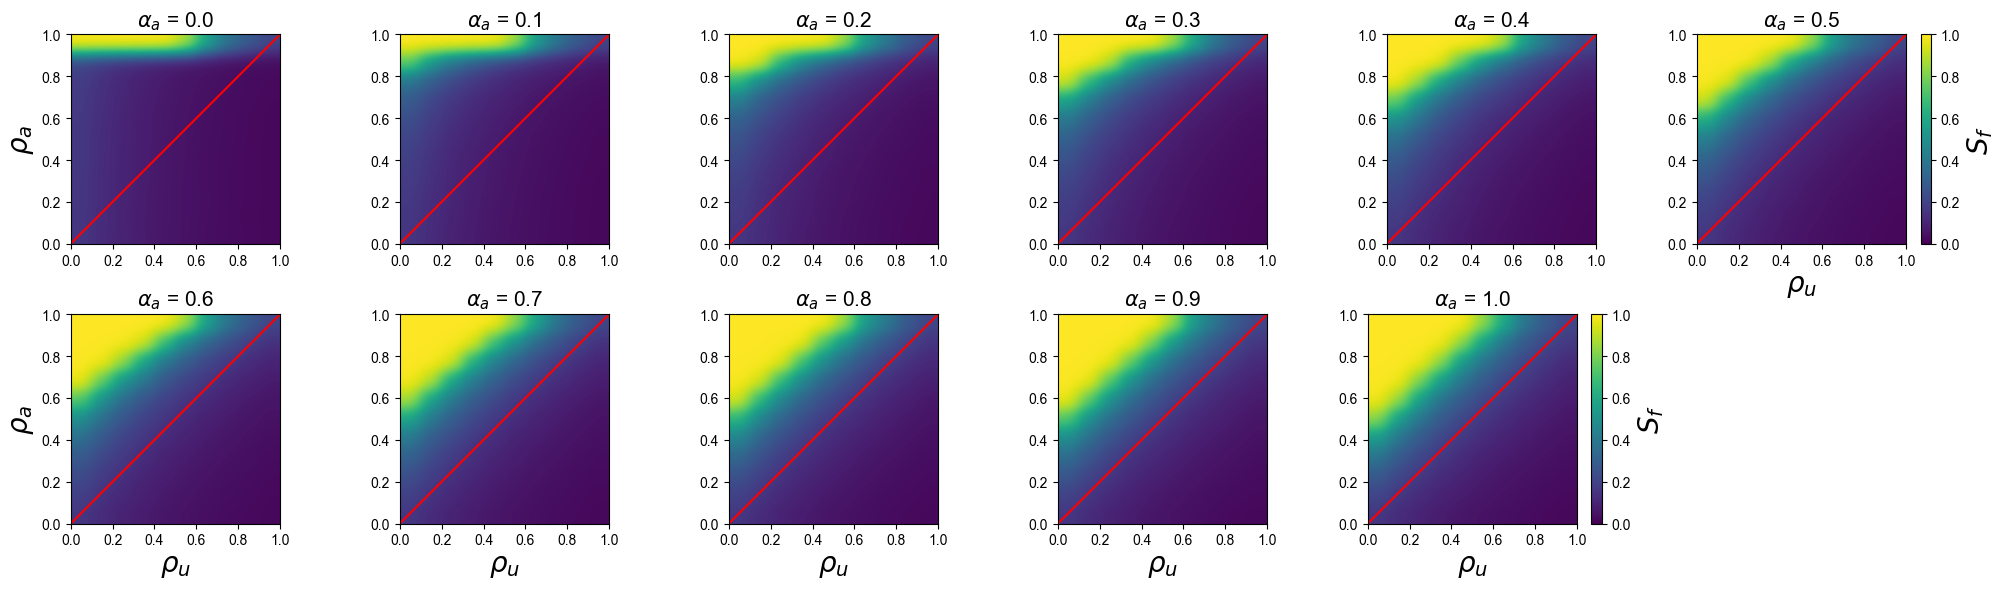

CPU times: user 4.32 s, sys: 57 ms, total: 4.38 s
Wall time: 4.37 s


In [31]:
%%time
plt.rcParams['figure.figsize'] = 20, 6

susceptible_matrix = np.empty([11,11])
matrix_array = np.empty([11,11,11])

for l_num, l in enumerate(aw_cte):
    print(l)
    for i_num, i in enumerate(decay_aw):
        #print(i)
        for j_num, j in enumerate(decay_unaw):

            df2plot = df_true_fake_perc_aw_lv.loc[(df_true_fake_perc_aw_lv["decay-aw"]==round(i,2)) & (df_true_fake_perc_aw_lv["decay-unaw"]==round(j,2)) & (df_true_fake_perc_aw_lv["%awareness-cte"]==round(l,2)) ]
            #df2plot_out = np.zeros(800)
            #df2plot_std = np.zeros(800)

            #for k in np.arange(800):
            df_aux = df2plot.loc[(df2plot["[step]"].values==1000)]
            aux  = df_aux["count turtles with [ susceptible? ]"].mean()
            aux2 = df_aux["count turtles with [ susceptible? ]"].std()
            #df2plot_out[k] = aux
            #df2plot_std[k] = aux2

            #susceptible_matrix.append([decay_aw, decay_unaw, df2plot_out[-1]])
            #print(i)
            susceptible_matrix[int(i_num)][int(j_num)] = aux #df2plot_out[-1]
            
    #print(k)
    #print(k*10)
    #print(list(susceptible_matrix[::-1]))
    matrix_array[l_num] = susceptible_matrix[::-1]
    plt.subplot(2,6,l_num+1)
    plt.imshow(susceptible_matrix[:,:-1][::-1]/10000, extent=[0,1,0,1], interpolation="gaussian") # CORRER DE NUEVO!! EJECUTANDO HASTA RHO_A,U=0.99, NO 1.0.
    #plt.imshow(susceptible_matrix[::-1], extent=[0,1,0,1]) # CORRER DE NUEVO!! EJECUTANDO HASTA RHO_A,U=0.99, NO 1.0.
    plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle="solid", color="red")
    if l_num==5 or l_num==10: 
        cbar = plt.colorbar()
        cbar.set_label(r'$S_f$', size=20)  # Setting the colorbar name here

    plt.clim(0,1.0)
    plt.title(r"$\alpha_a$ = {}".format(l), size=15)
    if l_num>=5:
        plt.xlabel(r"$\rho_u$", size=20) # %awareness
    if l_num==0 or l_num==6:
        plt.ylabel(r"$\rho_a$", size=20)
    plt.tight_layout()
    
#plt.savefig("images/true-fake_info_dens_plot_inf_all.pdf")
#plt.savefig("images/true-fake_info_dens_plot_inf_all-arial.pdf")
plt.savefig("images/true-fake_info_dens_plot_inf_all-arial.jpg", format='jpg', dpi=300)


plt.show()

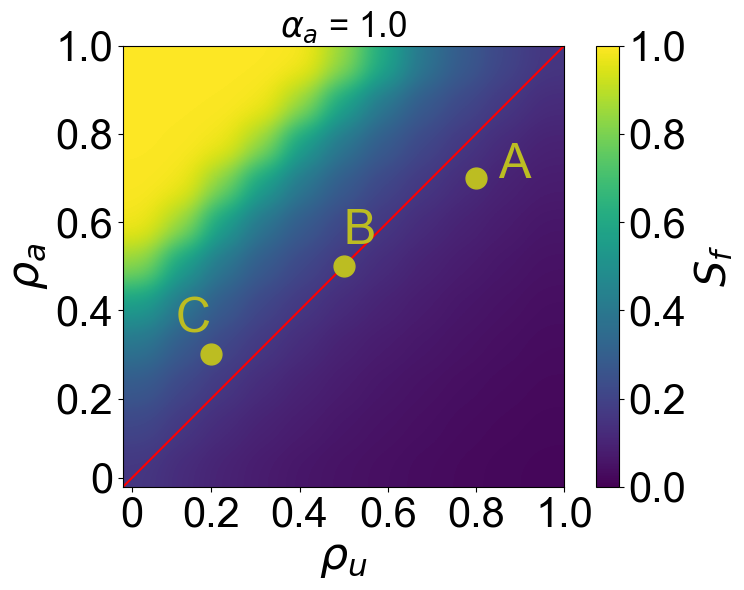

In [32]:
plt.rcParams["figure.figsize"] = 8, 6

plt.imshow(matrix_array[10]/10000, extent=[0,1,0,1], interpolation="gaussian")

#colorbar
cb = plt.colorbar() # grab the Colorbar instance
cb.ax.tick_params(labelsize=30)
cb.set_label(r"$S_f$", size=30)
#for t in cb.ax.get_yticklabels():
#     t.set_fontsize(20)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle="solid", color="red")
plt.clim(0,1.0)


plt.title(r"$\alpha_a$ = {}".format(1.0), size=25)
plt.xlabel(r"$\rho_u$", size=32)
plt.ylabel(r"$\rho_a$", size=32)
plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].round(1) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

# (rho, alpha_aw)
plt.plot(0.8, 0.7, '#bcbd22', marker="o", markersize=15) # (rho, awareness_cte)
plt.plot(0.5, 0.5, '#bcbd22', marker="o", markersize=15)
plt.plot(0.2, 0.3, '#bcbd22', marker="o", markersize=15) 

# (rho, alpha_aw)
plt.annotate("A", (0.85, 0.7), size=35, color="#bcbd22")
plt.annotate("B", (0.50, 0.55), size=35, color="#bcbd22")
plt.annotate("C", (0.12, 0.35), size=35, color="#bcbd22")

plt.tight_layout()
#plt.savefig("images/true-fake_info_dens_plot_inf_a.pdf")
plt.savefig("images/true-fake_info_dens_plot_inf_a-arial.pdf")

plt.show()

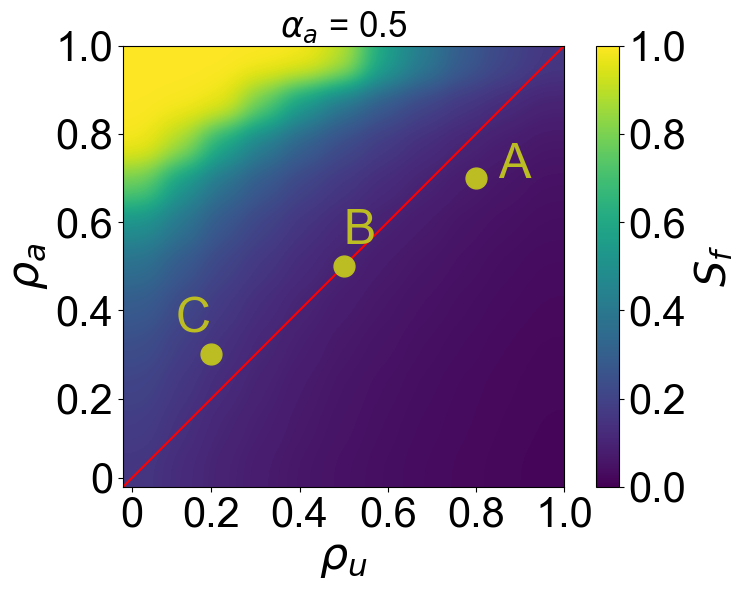

In [33]:
plt.rcParams["figure.figsize"] = 8, 6

plt.imshow(matrix_array[4]/10000, extent=[0,1,0,1], interpolation="gaussian")

#colorbar
cb = plt.colorbar() # grab the Colorbar instance
cb.ax.tick_params(labelsize=30)
cb.set_label(r"$S_f$", size=30)
#for t in cb.ax.get_yticklabels():
#     t.set_fontsize(20)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle="solid", color="red")
plt.clim(0,1.0)

plt.title(r"$\alpha_a$ = {}".format(0.5), size=25)
plt.xlabel(r"$\rho_u$", size=32)
plt.ylabel(r"$\rho_a$", size=32)
plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].round(1) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

# (rho, alpha_aw)
plt.plot(0.8, 0.7, '#bcbd22', marker="o", markersize=15) # (rho, awareness_cte)
plt.plot(0.5, 0.5, '#bcbd22', marker="o", markersize=15)
plt.plot(0.2, 0.3, '#bcbd22', marker="o", markersize=15) 

# (rho, alpha_aw)
plt.annotate("A", (0.85, 0.7), size=35, color="#bcbd22")
plt.annotate("B", (0.50, 0.55), size=35, color="#bcbd22")
plt.annotate("C", (0.12, 0.35), size=35, color="#bcbd22")

plt.tight_layout()
#plt.savefig("images/true-fake_info_dens_plot_inf_b.pdf")
plt.savefig("images/true-fake_info_dens_plot_inf_b-arial.pdf")

plt.show()

In [34]:
# In this case the file is "unaw1.0" because it is equal to "aw1.0". In both cases
# the awareness is 1.0 and unawareness 1.0
susceptible1, susceptible1_std, susceptible2, susceptible2_std, susceptible3, susceptible3_std = \
get_susceptible_stdev( "data/fake_news-3points-1point-unaw1.0.csv",  "data/fake_news-3points-2point-unaw1.0.csv",  "data/fake_news-3points-3point-unaw1.0.csv")

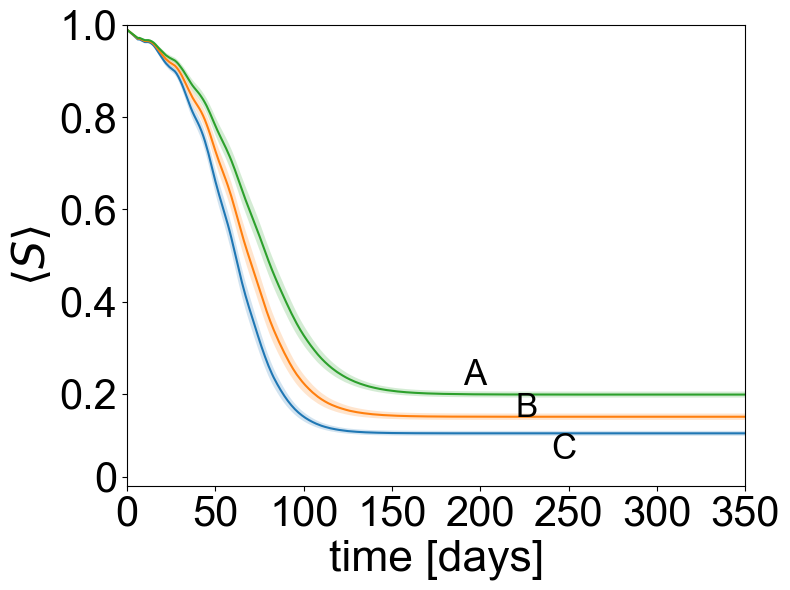

In [35]:
plt.rcParams["figure.figsize"] = 8, 6

time = np.arange(0,1000)
# Data
plt.plot(np.array(susceptible1)/10000)
plt.fill_between(time, np.array(susceptible1)/10000+np.array(susceptible1_std)/10000, np.array(susceptible1)/10000-np.array(susceptible1_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible2)/10000)
plt.fill_between(time, np.array(susceptible2)/10000+np.array(susceptible2_std)/10000, np.array(susceptible2)/10000-np.array(susceptible2_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible3)/10000)
plt.fill_between(time, np.array(susceptible3)/10000+np.array(susceptible3_std)/10000, np.array(susceptible3)/10000-np.array(susceptible3_std)/10000, alpha=0.2)


# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (190, 0.22), size=25)
plt.annotate("B", (220, 0.15), size=24)
plt.annotate("C", (240, 0.06), size=25)

plt.tight_layout()
#plt.savefig("images/true-fake_info_time_plot_inf_a.pdf")
plt.savefig("images/true-fake_info_time_plot_inf_a-arial.pdf")

plt.show()

In [36]:
susceptible1_05, susceptible1_05_std, susceptible2_05, susceptible2_05_std, susceptible3_05, susceptible3_05_std = \
get_susceptible_stdev( "data/fake_news-3points-1point-aw0.5.csv",  "data/fake_news-3points-2point-aw0.5.csv",  "data/fake_news-3points-3point-aw0.5.csv")

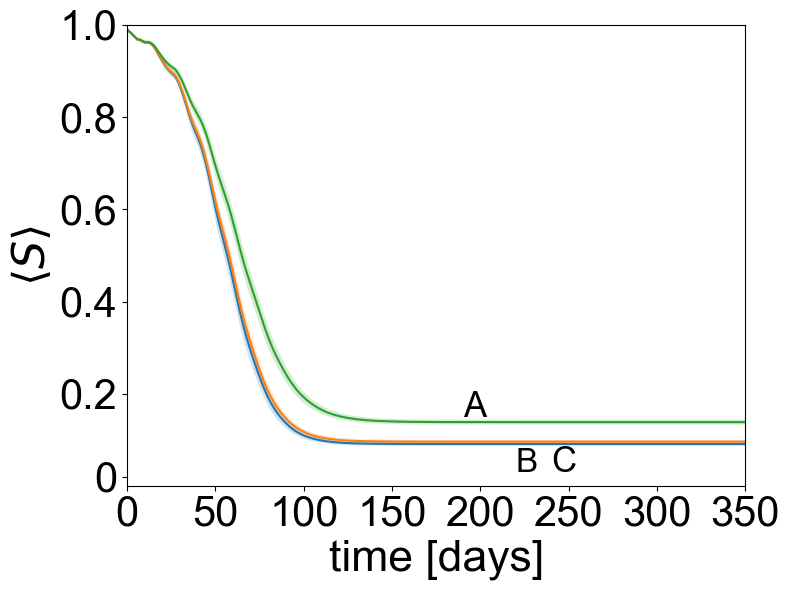

In [37]:
plt.rcParams["figure.figsize"] = 8, 6

time = np.arange(0,1000)
# Data
plt.plot(np.array(susceptible1_05)/10000)
plt.fill_between(time, np.array(susceptible1_05)/10000+np.array(susceptible1_05_std)/10000, np.array(susceptible1_05)/10000-np.array(susceptible1_05_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible2_05)/10000)
plt.fill_between(time, np.array(susceptible2_05)/10000+np.array(susceptible2_05_std)/10000, np.array(susceptible2_05)/10000-np.array(susceptible2_05_std)/10000, alpha=0.2)

plt.plot(np.array(susceptible3_05)/10000)
plt.fill_between(time, np.array(susceptible3_05)/10000+np.array(susceptible3_05_std)/10000, np.array(susceptible3_05)/10000-np.array(susceptible3_05_std)/10000, alpha=0.2)


# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (190, 0.15), size=25)
plt.annotate("B", (220, 0.03), size=24)
plt.annotate("C", (240, 0.03), size=25)

plt.tight_layout()
#plt.savefig("images/true-fake_info_time_plot_inf_b.pdf")
plt.savefig("images/true-fake_info_time_plot_inf_b-arial.pdf")

plt.show()

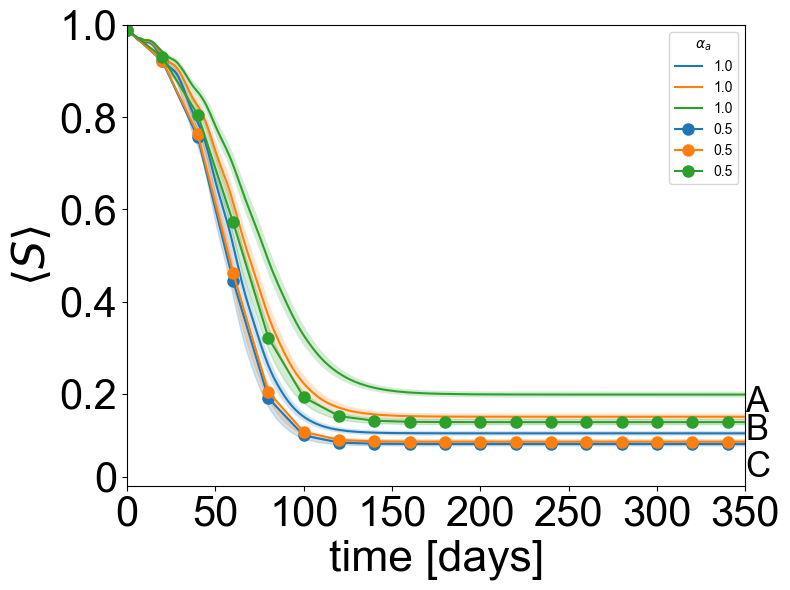

In [38]:
plt.plot(time, np.array(susceptible1)/10000, label="1.0")
plt.plot(time, np.array(susceptible2)/10000, label="1.0")
plt.plot(time, np.array(susceptible3)/10000, label="1.0")
plt.plot(time[::20], np.array(susceptible1_05)[::20]/10000, marker='o', markersize= 8, color="#1f77b4", label="0.5")
plt.plot(time[::20], np.array(susceptible2_05)[::20]/10000, marker='o', markersize= 8, color="#ff7f0e", label="0.5")
plt.plot(time[::20], np.array(susceptible3_05)[::20]/10000, marker='o', markersize= 8, color="#2ca02c", label="0.5")

plt.fill_between(time, np.array(susceptible1)/10000+np.array(susceptible1_std)/10000, np.array(susceptible1)/10000-np.array(susceptible1_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible2)/10000+np.array(susceptible2_std)/10000, np.array(susceptible2)/10000-np.array(susceptible2_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible3)/10000+np.array(susceptible3_std)/10000, np.array(susceptible3)/10000-np.array(susceptible3_std)/10000, alpha=0.2)
plt.fill_between(time, np.array(susceptible1_05)/10000+np.array(susceptible1_05_std)/10000, np.array(susceptible1_05)/10000-np.array(susceptible1_05_std)/10000, alpha=0.2, color="#1f77b4")
plt.fill_between(time, np.array(susceptible2_05)/10000+np.array(susceptible2_05_std)/10000, np.array(susceptible2_05)/10000-np.array(susceptible2_05_std)/10000, alpha=0.2, color="#ff7f0e")
plt.fill_between(time, np.array(susceptible3_05)/10000+np.array(susceptible3_05_std)/10000, np.array(susceptible3_05)/10000-np.array(susceptible3_05_std)/10000, alpha=0.2, color="#2ca02c")

# Plot customization 
plt.xlim(0,350)
plt.ylim(0, 1)
plt.xlabel("time [days]", size=32)
#plt.ylabel(r"$\big<S\big>$", size=32)
plt.ylabel(r"$\left\langle S \right\rangle$", size=32)

plt.xticks(size=30)
plt.yticks(size=30)

# avoid that 0.0 of y and x axis overlap, and change 0.0 by 0
locsx, labelsx = plt.xticks()
plt.draw()
locsx[0] = 0.02
labelsx_array = [item.get_position()[0].astype(int) for item in labelsx]
labelsx_array[0] = 0
plt.xticks(locsx, labelsx_array) # (locs, label)

locsy, labelsy = plt.yticks()
plt.draw()
locsy[0] = 0.02
labelsy_array = [item.get_position()[1].round(1) for item in labelsy]
labelsy_array[0] = 0
plt.yticks(locsy, labelsy_array) # (locs, label)

plt.annotate("A", (350, 0.16), size=25)
plt.annotate("B", (350, 0.10), size=25)
plt.annotate("C", (350, 0.02), size=25)

# awareness
plt.legend(title=r"$\alpha_a$")

plt.tight_layout()
#plt.savefig("images/true-fake_info_time_plot_inf_mix.pdf")
plt.savefig("images/true-fake_info_time_plot_inf_mix-arial.pdf")

plt.show()